# Задача 1

Пусть $X_1, X_2, \ldots, X_n$ — выборка из экспоненциального распределения с параметром $\lambda$. Найти оценку максимального правдоподобия параметра $\lambda$, сравнить ее с байесовской оценкой (MAP и математическое ожидание апостреорного распределения), подобрав сопряженное распределение. Сравнить полученные байесовские оценки с оценкой MLE. Найти предсказательное распределение

## Экспоненциальное распределение

Пусть $X_1,\dots,X_n$ — независимая выборка из экспоненциального распределения с параметром $\lambda>0$.

Плотность экспоненциального распределения:
$$
f(x\mid \lambda)=
\begin{cases}
\lambda e^{-\lambda x}, & x\ge 0,\\
0, & x<0,
\end{cases}
\qquad \lambda>0.
$$

---

## Функция правдоподобия и лог-правдоподобие

Так как $X_1,\dots,X_n$ независимы, совместная плотность равна произведению:
$$
f(x_1,\dots,x_n\mid \lambda)=\prod_{i=1}^n f(x_i\mid \lambda).
$$

Функция правдоподобия (подставляем наблюдения $X_i$ вместо $x_i$):
$$
L(\lambda)=\prod_{i=1}^n f(X_i\mid \lambda)
=\prod_{i=1}^n \left(\lambda e^{-\lambda X_i}\right).
$$

Раскроем произведение по множителям:

1) Все множители $\lambda$:
$$
\prod_{i=1}^n \lambda = \lambda\cdot\lambda\cdots\lambda = \lambda^n.
$$

2) Все множители $e^{-\lambda X_i}$:
$$
\prod_{i=1}^n e^{-\lambda X_i}
= e^{-\lambda X_1}\cdot e^{-\lambda X_2}\cdots e^{-\lambda X_n}
= e^{-\lambda (X_1+X_2+\cdots+X_n)},
$$
так как $e^a e^b = e^{a+b}$.

Введём обозначение суммы:
$$
S=\sum_{i=1}^n X_i = X_1+X_2+\cdots+X_n.
$$

Тогда произведение экспонент перепишется как:
$$
\prod_{i=1}^n e^{-\lambda X_i} = e^{-\lambda S}.
$$

Собираем всё вместе:
$$
L(\lambda)=\left(\prod_{i=1}^n \lambda\right)\left(\prod_{i=1}^n e^{-\lambda X_i}\right)
=\lambda^n e^{-\lambda S}.
$$

Также можно записать через экспоненту:
$$
L(\lambda)=\lambda^n \exp(-\lambda S).
$$

---

### Лог-правдоподобие

Определение:
$$
\ell(\lambda)=\ln L(\lambda).
$$

Подставляем $L(\lambda)=\lambda^n e^{-\lambda S}$:
$$
\ell(\lambda)=\ln\left(\lambda^n e^{-\lambda S}\right).
$$

Используем свойство логарифма произведения: $\ln(ab)=\ln a+\ln b$:
$$
\ell(\lambda)=\ln(\lambda^n)+\ln\left(e^{-\lambda S}\right).
$$

Теперь каждую часть отдельно.

1) $\ln(\lambda^n)=n\ln\lambda$ (свойство: $\ln(a^n)=n\ln a$):
$$
\ln(\lambda^n)=n\ln\lambda.
$$

2) $\ln(e^{-\lambda S})=-\lambda S$ (потому что $\ln(e^t)=t$):
$$
\ln\left(e^{-\lambda S}\right)=-\lambda S.
$$

Итого:
$$
\ell(\lambda)=n\ln\lambda-\lambda S.
$$

---

## Оценка максимального правдоподобия (MLE)

Найдём максимум $L(\lambda)$ по $\lambda>0$.
Эквивалентно максимизировать $\ell(\lambda)$, так как логарифм монотонно возрастает.

### Первая производная

Берём производную по $\lambda$:
$$
\ell(\lambda)=n\ln\lambda-\lambda S.
$$

Производная первой части:
$$
\frac{d}{d\lambda}\bigl(n\ln\lambda\bigr)=n\cdot\frac{1}{\lambda}=\frac{n}{\lambda}.
$$

Производная второй части (здесь $S$ не зависит от $\lambda$, это константа по $\lambda$):
$$
\frac{d}{d\lambda}(-\lambda S)=-S.
$$

Следовательно,
$$
\ell'(\lambda)=\frac{n}{\lambda}-S.
$$

### Условие критической точки

Приравниваем к нулю:
$$
\ell'(\lambda)=0
\quad\Longleftrightarrow\quad
\frac{n}{\lambda}-S=0.
$$

Решаем уравнение по $\lambda$:

1) переносим $S$ вправо:
$$
\frac{n}{\lambda}=S.
$$

2) умножаем обе части на $\lambda$:
$$
n=S\lambda.
$$

3) делим на $S$ (предполагается $S>0$, что верно почти всегда для экспоненциальной выборки):
$$
\lambda=\frac{n}{S}.
$$

Значит,
$$
\hat\lambda_{\text{MLE}}=\frac{n}{S}=\frac{n}{\sum_{i=1}^n X_i}.
$$

### Проверка, что это максимум (вторая производная)

Найдём вторую производную:
$$
\ell'(\lambda)=\frac{n}{\lambda}-S.
$$

Производная $\frac{n}{\lambda}=n\lambda^{-1}$:
$$
\frac{d}{d\lambda}\left(n\lambda^{-1}\right)=n\cdot(-1)\lambda^{-2}=-\frac{n}{\lambda^2}.
$$

Производная от $-S$ равна $0$ (константа по $\lambda$), поэтому:
$$
\ell''(\lambda)=-\frac{n}{\lambda^2}.
$$

Так как $n>0$ и $\lambda>0$, то $\lambda^2>0$, значит:
$$
\ell''(\lambda)=-\frac{n}{\lambda^2}<0 \quad (\lambda>0).
$$

Следовательно, $\ell(\lambda)$ строго вогнута на $(0,\infty)$,
и найденная критическая точка даёт глобальный максимум.

---

## Итог (MLE)

$$
\boxed{\hat\lambda_{\text{MLE}}=\dfrac{n}{\sum_{i=1}^n X_i}}.
$$

Заметим, что $\bar X (выборочное среднее) =\dfrac{1}{n}\sum_{i=1}^n X_i=\dfrac{S}{n}$, поэтому
$$
\hat\lambda_{\text{MLE}}=\frac{n}{S}=\frac{1}{S/n}=\frac{1}{\bar X}.
$$

То есть окончательно:
$$
\boxed{\hat\lambda_{\text{MLE}}=\dfrac{n}{\sum_{i=1}^n X_i}=\dfrac{1}{\bar X}}.
$$

## Байесовский подход: априорное, апостериорное распределение и MAP

Мы уже получили функцию правдоподобия для экспоненциальной выборки:
$$
L(\lambda)=\prod_{i=1}^n f(X_i\mid\lambda)=\lambda^n e^{-\lambda S},
\qquad S=\sum_{i=1}^n X_i.
$$

В байесовском подходе $\lambda$ считается случайной величиной с априорным распределением.
Для экспоненциального распределения (с параметром $\lambda$) сопряжённым является гамма-распределение.

---

## 1) Выбор сопряжённого априорного распределения

Возьмём:
$$
\lambda \sim \mathrm{Gamma}(\alpha,\beta),
\qquad \alpha>0,\ \beta>0,
$$

Плотность гамма-распределения:
$$
\pi(\lambda)=p(\lambda)
=\frac{\beta^\alpha}{\Gamma(\alpha)}\lambda^{\alpha-1}e^{-\beta\lambda},
\qquad \lambda>0.
$$

Почему именно Gamma:
- в правдоподобии есть множитель $\lambda^n$ (степень по $\lambda$),
- и множитель $e^{-\lambda S}$ (экспонента по $\lambda$),
а у Gamma плотность имеет вид $\lambda^{\alpha-1}e^{-\beta\lambda}$.
Это означает, что произведение априорное $\times$ likelihood даст снова гамма-вид.

---

## 2) Апостериорное распределение (вывод через формулу Байеса)

По формуле Байеса:
$$
p(\lambda\mid x_1,\dots,x_n)
=\frac{p(x_1,\dots,x_n\mid\lambda)\,p(\lambda)}
{\int_0^\infty p(x_1,\dots,x_n\mid u)\,p(u)\,du}.
$$

Нас интересует форма зависимости от $\lambda$, поэтому возьмем пропорционально:
$$
p(\lambda\mid x_1,\dots,x_n)\propto p(x_1,\dots,x_n\mid\lambda)\,p(\lambda)
= L(\lambda)\,\pi(\lambda).
$$

Подставим:
$$
L(\lambda)=\lambda^n e^{-\lambda S},
\qquad
\pi(\lambda)=\frac{\beta^\alpha}{\Gamma(\alpha)}\lambda^{\alpha-1}e^{-\beta\lambda}.
$$

Тогда произведение:
$$
L(\lambda)\pi(\lambda)
=\left(\lambda^n e^{-\lambda S}\right)
\left(\frac{\beta^\alpha}{\Gamma(\alpha)}\lambda^{\alpha-1}e^{-\beta\lambda}\right).
$$

Соберём множители по $\lambda$:

1) Степени $\lambda$:
$$
\lambda^n\cdot \lambda^{\alpha-1}=\lambda^{n+\alpha-1}.
$$

2) Экспоненты:
$$
e^{-\lambda S}\cdot e^{-\beta\lambda}=e^{-\lambda(S+\beta)}.
$$

Константу $\frac{\beta^\alpha}{\Gamma(\alpha)}$ можно вынести как не зависящую от $\lambda$:
$$
L(\lambda)\pi(\lambda)
\propto
\lambda^{n+\alpha-1}e^{-(S+\beta)\lambda}.
$$

Это ровно форма Gamma-плотности:
$$
\lambda^{\alpha'-1}e^{-\beta'\lambda},
$$
где
$$
\alpha'=\alpha+n,
\qquad
\beta'=\beta+S.
$$

Следовательно,
$$
\boxed{\lambda\mid x_1,\dots,x_n \sim \mathrm{Gamma}(\alpha+n,\ \beta+S).}
$$

---

## 3) Нормировка апостериорной плотности (избавляемся от пропорциональности)

Мы знаем: если $Y\sim \mathrm{Gamma}(k,r)$, то его плотность:
$$
p(y)=\frac{r^k}{\Gamma(k)}y^{k-1}e^{-ry},\quad y>0.
$$

Значит апостериорная плотность равна:
$$
p(\lambda\mid x_1,\dots,x_n)
=\frac{(\beta+S)^{\alpha+n}}{\Gamma(\alpha+n)}
\lambda^{\alpha+n-1}e^{-(\beta+S)\lambda},
\qquad \lambda>0.
$$

---

## 4) MAP-оценка (максимум апостериорной плотности)

MAP — это точка максимума апостериорной плотности:

Удобнее максимизировать логарифм апостериорной плотности.

### 4.1) Лог апостериорной плотности

Берём лог от $p(\lambda\mid x)$:
$$
p(\lambda\mid x)=C\cdot \lambda^{\alpha+n-1}e^{-(\beta+S)\lambda},
$$
где
$$
C=\frac{(\beta+S)^{\alpha+n}}{\Gamma(\alpha+n)}
$$
— константа по $\lambda$.

Тогда
$$
\ln p(\lambda\mid x)
=\ln C + (\alpha+n-1)\ln\lambda - (\beta+S)\lambda.
$$

Так как $\ln C$ не зависит от $\lambda$, на максимум это не влияет.
Обозначим:
$$
g(\lambda)=(\alpha+n-1)\ln\lambda-(\beta+S)\lambda.
$$
Тогда максимум $\ln p(\lambda\mid x)$ достигается там же, где максимум $g(\lambda)$.

### 4.2) Первая производная

$$
g'(\lambda)=\frac{\alpha+n-1}{\lambda}-(\beta+S).
$$

### 4.3) Приравниваем к нулю

$$
\frac{\alpha+n-1}{\lambda}-(\beta+S)=0
\quad\Longleftrightarrow\quad
\frac{\alpha+n-1}{\lambda}=\beta+S.
$$

Умножаем на $\lambda$:
$$
\alpha+n-1=(\beta+S)\lambda.
$$

Делим на $(\beta+S)$:
$$
\lambda=\frac{\alpha+n-1}{\beta+S}.
$$

Значит
$$
\boxed{\hat\lambda_{\text{MAP}}=\frac{\alpha+n-1}{\beta+S}.}
$$

### 4.4) Проверка максимума

Вторая производная:
$$
g''(\lambda)=-\frac{\alpha+n-1}{\lambda^2}.
$$

Если $\alpha+n-1>0$, то при $\lambda>0$:
$$
g''(\lambda)<0,
$$
значит это максимум.

**Замечание про крайний случай:**  
Если $\alpha+n-1\le 0$, то внутренняя критическая точка не существует в корректном виде,
и максимум апостериорной плотности достигается на границе $\lambda\to 0^+$.
На практике обычно берут $\alpha>1$ (или достаточно большое $n$), чтобы MAP был внутри $(0,\infty)$.

---

## 5) Сравнение MAP с MLE

Мы нашли ранее:
$$
\hat\lambda_{\text{MLE}}=\frac{n}{S}.
$$

MAP:
$$
\hat\lambda_{\text{MAP}}=\frac{\alpha+n-1}{\beta+S}.
$$

Интерпретация:
- к числу наблюдений $n$ добавляется $\alpha-1$,
- к сумме $S$ добавляется $\beta$.

Если априорное "слабый" (например, $\alpha,\beta$ маленькие), то при большом $n$:
$$
\hat\lambda_{\text{MAP}}\approx \frac{n}{S}=\hat\lambda_{\text{MLE}}.
$$

А если априорное "сильный", то MAP заметно отличается от MLE.

---

### Итог по MAP

Апостериорное распределение:
$$
\boxed{\lambda\mid x_1,\dots,x_n \sim \mathrm{Gamma}(\alpha+n,\ \beta+S).}
$$

MAP-оценка (при $\alpha+n>1$):
$$
\boxed{\hat\lambda_{\text{MAP}}=\frac{\alpha+n-1}{\beta+S}.}
$$

# Задача 2

**Мультиномиальное распределение**

Пусть проводится серия из $n$ испытаний и в результате каждого испытания происходит ровно одно событие из набора $A_1, A_2, \dots, A_m$, причем вероятности этих событий равны соответственно $\mathsf{p}_1, \mathsf{p}_2, \dots, \mathsf{p}_m$, причем
$$\sum_{i=1}^{m}\mathsf{p}_i = 1.$$

Тогда совместное распределение величин $X_1, X_2, \dots, X_m$, где $X_k$ — число наступлений события $A_k$ в серии из $n$ испытаний, задается вероятностями

$$
\mathsf{P}\left(X_1 = n_1, \dots, X_m = n_m, \right) = \frac{n!}{n_1!\dots n_m!}\mathsf{p}_1^{n_1}\dots \mathsf{p}_m^{n_m},
$$

где $n_1, n_2, \dots, n_m$ — произвольный набор целых неотрицательных чисел, таких что

$$\sum_{i=1}^m n_i = n.$$

Произведите байесовский вывод для мультиномиального распределения: найдите апостериорное распределение, используя в качестве сопоряженного распределения к правдоподобию [распределение Дирихле](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%94%D0%B8%D1%80%D0%B8%D1%85%D0%BB%D0%B5), найдите предсказательное распределение. Объясните результат.

## Мультиномиальное распределение и байесовский вывод (кратко)

Пусть проводится серия из $n$ испытаний, и в каждом испытании происходит ровно одно из событий $A_1,\dots,A_m$ с вероятностями
$$
\mathbf p=(p_1,\dots,p_m),\qquad p_i\ge 0,\qquad \sum_{i=1}^m p_i=1.
$$

Пусть $X_i$ — число наступлений события $A_i$ за $n$ испытаний, тогда
$$
\sum_{i=1}^m X_i=n,
$$
и вектор $\mathbf X=(X_1,\dots,X_m)$ имеет мультиномиальное распределение:
$$
p(\mathbf x\mid \mathbf p)
=\mathsf P(X_1=x_1,\dots,X_m=x_m\mid \mathbf p)
=\frac{n!}{x_1!\cdots x_m!}\prod_{i=1}^m p_i^{x_i}.
$$

---

## Сопряжённое априорное: распределение Дирихле

Выберем априорное распределение
$$
\mathbf p\sim \mathrm{Dir}(\boldsymbol\alpha),
\qquad \boldsymbol\alpha=(\alpha_1,\dots,\alpha_m),\ \alpha_i>0,
$$
с плотностью
$$
\pi(\mathbf p)=\frac{1}{B(\boldsymbol\alpha)}\prod_{i=1}^m p_i^{\alpha_i-1},
\qquad \sum_{i=1}^m p_i=1,
$$
где
$$
B(\boldsymbol\alpha)=\frac{\prod_{i=1}^m\Gamma(\alpha_i)}{\Gamma\!\left(\sum_{i=1}^m \alpha_i\right)}.
$$

---

## Апостериорное распределение

По Байесу:
$$
p(\mathbf p\mid \mathbf x)\propto p(\mathbf x\mid \mathbf p)\,\pi(\mathbf p).
$$

Подставляем:
$$
p(\mathbf p\mid \mathbf x)\propto
\left(\prod_{i=1}^m p_i^{x_i}\right)\left(\prod_{i=1}^m p_i^{\alpha_i-1}\right)
=\prod_{i=1}^m p_i^{\alpha_i+x_i-1}.
$$

Это снова Дирихле, значит
$$
\boxed{\mathbf p\mid \mathbf x \sim \mathrm{Dir}(\alpha_1+x_1,\dots,\alpha_m+x_m).}
$$

---

## Предсказательное распределение (для одного нового испытания)

Пусть $Y\in\{1,\dots,m\}$ — номер события в следующем испытании.
Тогда
$$
\mathsf P(Y=i\mid \mathbf x)=\mathbb E[p_i\mid \mathbf x].
$$

Для Дирихле:
$$
\mathbb E[p_i\mid \mathbf x]
=\frac{\alpha_i+x_i}{\sum_{j=1}^m(\alpha_j+x_j)}.
$$

Значит
$$
\boxed{\mathsf P(Y=i\mid \mathbf x)=\frac{\alpha_i+x_i}{\sum_{j=1}^m(\alpha_j+x_j)}.}
$$

---

## Предсказательное распределение (для новой серии из $t$ испытаний)

Пусть в новых $t$ испытаниях получились счётчики $\mathbf Y=(Y_1,\dots,Y_m)$, $\sum_i Y_i=t$.
Тогда интегрирование по $\mathbf p$ даёт распределение Дирихле–мультиномиальное:
$$
\boxed{
\mathsf P(\mathbf Y=\mathbf y\mid \mathbf x)
=\frac{t!}{y_1!\cdots y_m!}\,
\frac{B(\boldsymbol\alpha+\mathbf x+\mathbf y)}{B(\boldsymbol\alpha+\mathbf x)}.
}
$$

Здесь $\boldsymbol\alpha+\mathbf x=(\alpha_1+x_1,\dots,\alpha_m+x_m)$.

---

## Пояснение результата

- Дирихле является сопряжённым априорным к мультиномиальному likelihood.
- Апостериорное распределение получается простым прибавлением к счётчикам:
$$
\alpha_i \mapsto \alpha_i+x_i.
$$
- Предсказание для следующего исхода — это апостериорное среднее вероятности:
$$
\frac{\alpha_i+x_i}{\sum_j(\alpha_j+x_j)}.
$$

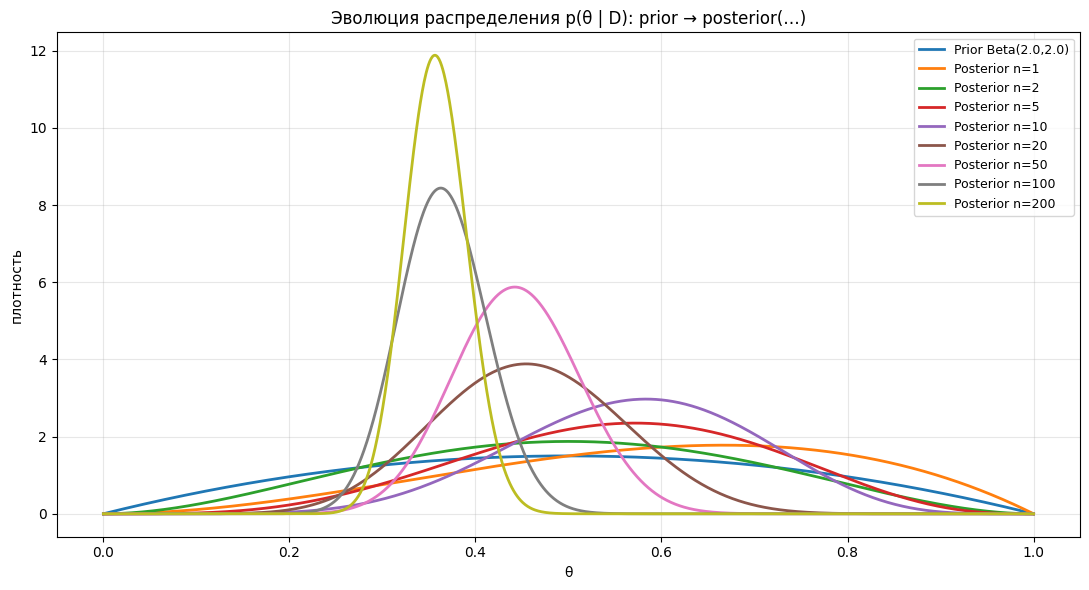


=== Несколько точек (MLE vs MAP) ===
    n |      MLE |      MAP |  |MLE-MAP|
----------------------------------------
    1 |   1.0000 |   0.6667 |     0.3333
    2 |   0.5000 |   0.5000 |     0.0000
    5 |   0.6000 |   0.5714 |     0.0286
   10 |   0.6000 |   0.5833 |     0.0167
   20 |   0.4500 |   0.4545 |     0.0045
   50 |   0.4400 |   0.4423 |     0.0023
  100 |   0.3600 |   0.3627 |     0.0027
  200 |   0.3550 |   0.3564 |     0.0014


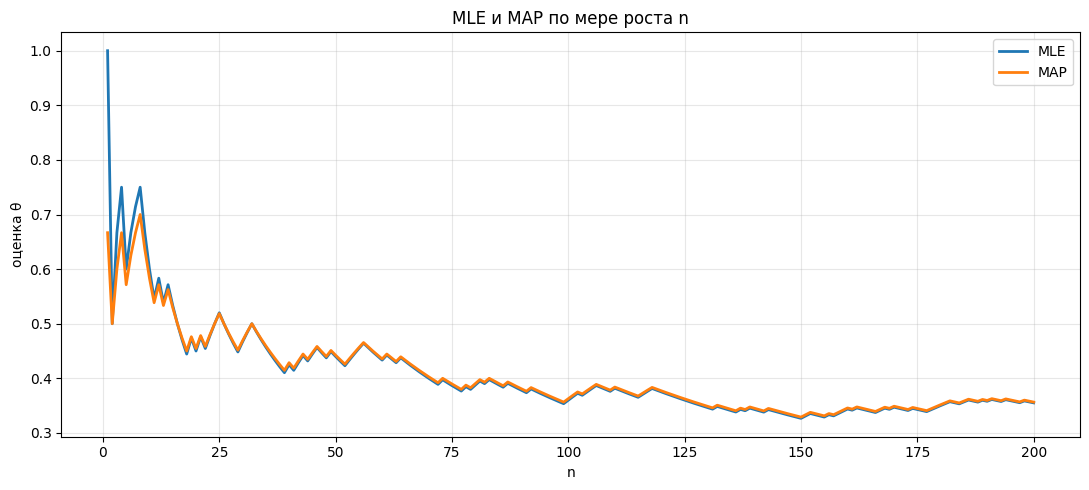

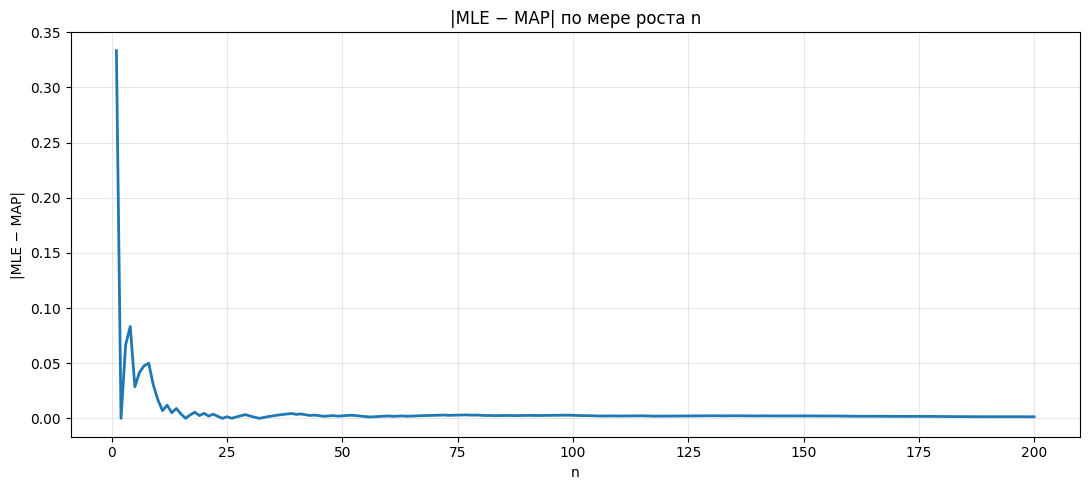


Сохранено:
/Users/macbook/Documents/ML/Lab_4_Stat/posterior_evolution.png
/Users/macbook/Documents/ML/Lab_4_Stat/mle_vs_map.png
/Users/macbook/Documents/ML/Lab_4_Stat/mle_map_diff.png


In [1]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt

# =========================
# Простая байесовская модель: Bernoulli + Beta
# =========================
# y_i ~ Bernoulli(theta)
# prior: theta ~ Beta(alpha0, beta0)
# posterior: theta|D ~ Beta(alpha0 + sum(y), beta0 + n - sum(y))
# MLE = sum(y)/n
# MAP = (alpha-1)/(alpha+beta-2)  (если alpha,beta > 1)

SAVE_DIR = "/Users/macbook/Documents/ML/Lab_4_Stat"
os.makedirs(SAVE_DIR, exist_ok=True)

# --- "известные" параметры генерации данных ---
rng = np.random.default_rng(42)
true_theta = 0.35
N = 200
y = rng.binomial(1, true_theta, size=N)

# --- prior ---
alpha0, beta0 = 2.0, 2.0

# --- сетка theta для плотностей ---
eps = 1e-4
theta = np.linspace(eps, 1 - eps, 1500)

def beta_pdf(t, a, b):
    # pdf = t^(a-1) (1-t)^(b-1) / B(a,b)
    logB = math.lgamma(a) + math.lgamma(b) - math.lgamma(a + b)
    return np.exp((a - 1) * np.log(t) + (b - 1) * np.log(1 - t) - logB)

def map_beta(a, b):
    if a <= 1 or b <= 1:
        return np.nan
    return (a - 1) / (a + b - 2)

# =========================
# 1) График: как меняется posterior по мере роста n
# =========================
snapshots = [1, 2, 5, 10, 20, 50, 100, 200]

plt.figure(figsize=(11, 6))
plt.plot(theta, beta_pdf(theta, alpha0, beta0), linewidth=2, label=f"Prior Beta({alpha0},{beta0})")

for n in snapshots:
    s = int(y[:n].sum())
    a = alpha0 + s
    b = beta0 + (n - s)

    post = beta_pdf(theta, a, b)
    plt.plot(theta, post, linewidth=2, label=f"Posterior n={n}")

plt.title("Эволюция распределения p(θ | D): prior → posterior(…)")
plt.xlabel("θ")
plt.ylabel("плотность")
plt.grid(True, alpha=0.3)
plt.legend(fontsize=9)
plt.tight_layout()

out1 = os.path.join(SAVE_DIR, "posterior_evolution.png")
plt.savefig(out1, dpi=300, bbox_inches="tight")
plt.show()

# =========================
# 2) Численно: MLE vs MAP и их разность по n
# =========================
mle = np.zeros(N)
mp  = np.zeros(N)
diff = np.zeros(N)

s = 0
for n in range(1, N + 1):
    s += int(y[n - 1])
    a = alpha0 + s
    b = beta0 + (n - s)

    mle[n - 1] = s / n
    mp[n - 1] = map_beta(a, b)
    diff[n - 1] = np.nan if np.isnan(mp[n - 1]) else abs(mle[n - 1] - mp[n - 1])

print("\n=== Несколько точек (MLE vs MAP) ===")
print(f"{'n':>5} | {'MLE':>8} | {'MAP':>8} | {'|MLE-MAP|':>10}")
print("-" * 40)
for n in snapshots:
    print(f"{n:5d} | {mle[n-1]:8.4f} | {mp[n-1]:8.4f} | {diff[n-1]:10.4f}")

# =========================
# 3) График: MLE и MAP (и их разность) vs n
# =========================
x = np.arange(1, N + 1)

plt.figure(figsize=(11, 5))
plt.plot(x, mle, linewidth=2, label="MLE")
plt.plot(x, mp, linewidth=2, label="MAP")
plt.title("MLE и MAP по мере роста n")
plt.xlabel("n")
plt.ylabel("оценка θ")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

out2 = os.path.join(SAVE_DIR, "mle_vs_map.png")
plt.savefig(out2, dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(11, 5))
plt.plot(x, diff, linewidth=2)
plt.title("|MLE − MAP| по мере роста n")
plt.xlabel("n")
plt.ylabel("|MLE − MAP|")
plt.grid(True, alpha=0.3)
plt.tight_layout()

out3 = os.path.join(SAVE_DIR, "mle_map_diff.png")
plt.savefig(out3, dpi=300, bbox_inches="tight")
plt.show()

print("\nСохранено:")
print(out1)
print(out2)
print(out3)